MNIST Images: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
MNIST Lables: [5 0 4 ... 5 6 8]
Digit 0
Mnist Images 5923
Mnist Labels 5923
Digit 1
Mnist Images 6742
Mnist Labels 6742
Digit 2
Mnist Images 5958
Mnist Labels 5958
Digit 3
Mnist Images 6131
Mnist Labels 6131
Digit 4
Mnist Images 5842
Mnist Labels 5842
Digit 5
Mnist Images 5421
Mnist Labels 5421
Digit 6
Mnist Images 5918
Mnist Labels 5918
Digit 7
Mnist Images 6265
Mnist Labels 6265
Digit 8
Mnist Images 5851
Mnist Labels 5851
Digit 9
Mnist Images 5949
Mnist Labels 5949


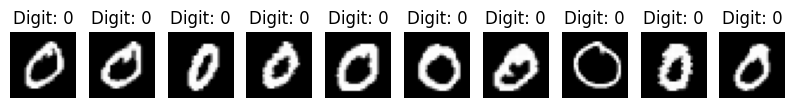

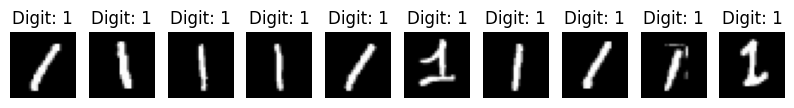

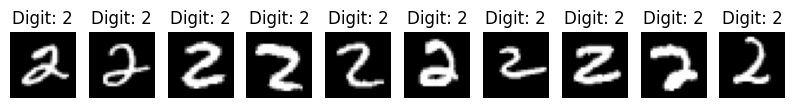

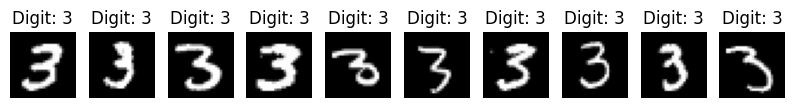

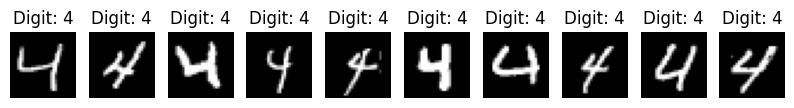

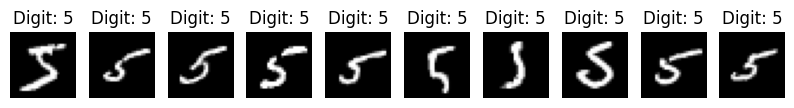

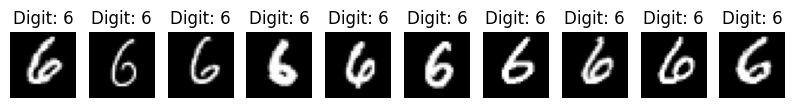

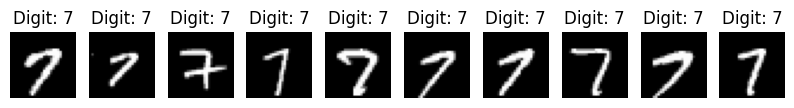

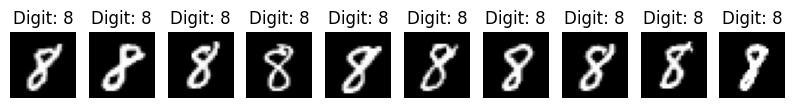

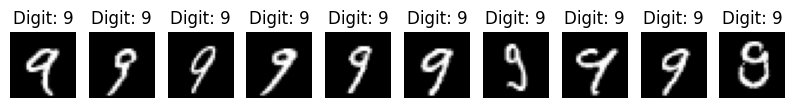

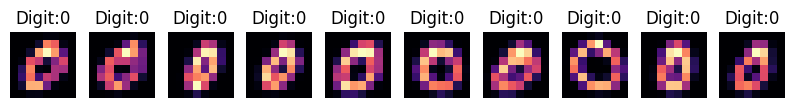

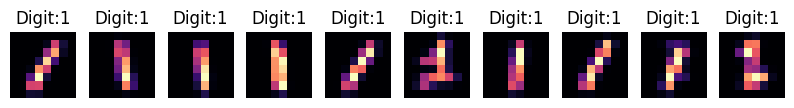

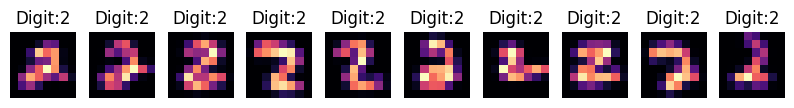

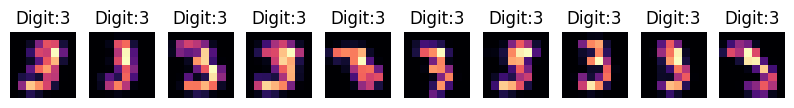

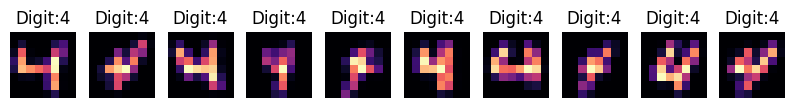

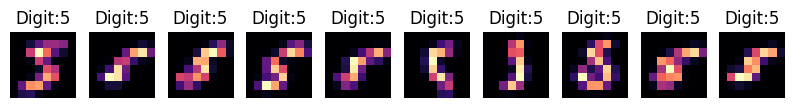

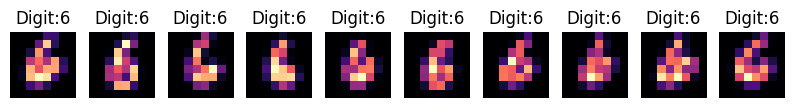

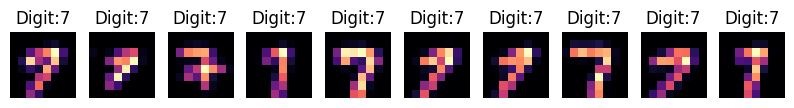

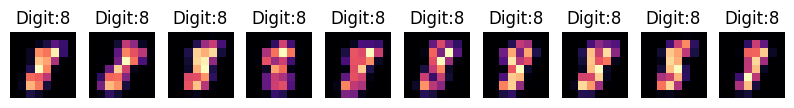

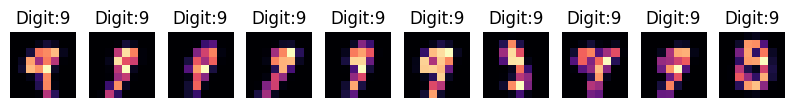

Digit zero [[0.00000000e+00 0.00000000e+00 5.02834929e-05 ... 5.04943733e-03
  2.54318312e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.64488586e-06 ... 2.44551014e-02
  2.39711887e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.95373525e-05 ... 5.52719367e-02
  4.29082453e-06 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.33822537e-04
  1.93436207e-08 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.30475596e-07 ... 1.49584173e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.45087318e-07 ... 5.72852573e-04
  3.43886591e-08 0.00000000e+00]]
Digit one [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.41505166e-07
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.26532695e-02 ... 2.13737652e+00
  3.00926886e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.68420508e-04 ... 4.41504330e-01
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00300256e-08
  0.0000000

In [2]:
# Quantum Amplitude Encoding
import idx2numpy
import numpy as np
import torch
from PIL import Image


def load_MNIST_dataset_Images(file_path): # for now trial on mnist dataset
    images = idx2numpy.convert_from_file(file_path)
    images = images.reshape(images.shape[0], -1)
    images = images.astype(np.float64)
    return images

def load_MNIST_dataset_Labels(file_path):
    labels = idx2numpy.convert_from_file(file_path)
    return labels

# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
train_images_file = r"C:\Users\Asus\Downloads\archive (8)\train-images.idx3-ubyte"
train_labels_file = r"C:\Users\Asus\Downloads\archive (8)\train-labels.idx1-ubyte"


mnist_images = load_MNIST_dataset_Images(train_images_file)
mnist_labels = load_MNIST_dataset_Labels(train_labels_file)

print('MNIST Images:', mnist_images)
print('MNIST Lables:', mnist_labels)


# Separating the load dataset into train labels and the train digits 

def separate_images_and_labels(images , labels , digit):
    digit_images = []
    digit_labels = []
    for image,label in zip(images,labels):
        if label == digit:
            digit_images.append(image)
            digit_labels.append(label)
    return digit_images,digit_labels

digits_to_separate = [0,1,2,3,4,5,6,7,8,9]

digit_image = {}
digit_label = {}

for digit in digits_to_separate:
    digit_image[digit], digit_label[digit] = separate_images_and_labels(mnist_images,mnist_labels,digit)

for digit in digits_to_separate:
    print('Digit', digit)
    print('Mnist Images', len(digit_image[digit]))
    print('Mnist Labels', len(digit_label[digit]))

import matplotlib.pyplot as plt

num_samples = 10 

for digit in digit_image.keys():
    sample_images = digit_image[digit][:num_samples]
    plt.figure(figsize = (10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(sample_images[i].reshape(28,28), cmap = 'gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')
    plt.show()

# Resize the image to a higher accuracy and match the dimensions of the qubits
N = 8
from skimage.transform import resize

def resize_images(images, new_size = (N,N)):
    resized_images = []
    for image in images:
        resized_image = resize(image.reshape(28,28), new_size)
        resized_images.append(resized_image.flatten())
    return resized_images

new_size = (N,N)

resized_digit_images = {}
for digit in digit_image.keys():
    resized_digit_images[digit] = resize_images(digit_image[digit], new_size = new_size)

for digit in digit_image.keys():
    sample_images = resized_digit_images[digit][:num_samples]
    plt.figure(figsize =(10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(sample_images[i].reshape(new_size), cmap = 'magma')
        plt.title(f"Digit:{digit}")
        plt.axis('off')
    plt.show()

# Converting all the digits in to arrays

Digit_zero = []

for image in resized_digit_images[0]:
    Digit_zero_ = image
    Digit_zero.append(Digit_zero_)

Digit_zero = np.array(Digit_zero)

print('Digit zero',Digit_zero)

Digit_one = []

for image in resized_digit_images[1]:
    Digit_one_ = image
    Digit_one.append(Digit_one_)

Digit_one = np.array(Digit_one)

print('Digit one',Digit_one)

Digit_two = []

for image in resized_digit_images[2]:
    Digit_two_ = image
    Digit_two.append(Digit_two_)

Digit_two = np.array(Digit_two)

print('Digit two',Digit_two)

Digit_three = []

for image in resized_digit_images[3]:
    Digit_three_ = image
    Digit_three.append(Digit_three_)

Digit_three = np.array(Digit_three)

print('Digit three',Digit_three)

Digit_four = []

for image in resized_digit_images[4]:
    Digit_four_ = image
    Digit_four.append(Digit_four_)

Digit_four = np.array(Digit_four)

print('Digit four',Digit_four)

Digit_fifth = []

for image in resized_digit_images[5]:
    Digit_fifth_ = image
    Digit_fifth.append(Digit_fifth_)

Digit_fifth = np.array(Digit_fifth)

print('Digit fifth',Digit_fifth)

Digit_sixth = []

for image in resized_digit_images[6]:
    Digit_sixth_ = image
    Digit_sixth.append(Digit_sixth_)

Digit_sixth = np.array(Digit_sixth)

print('Digit Sixth',Digit_sixth)

Digit_seventh = []

for image in resized_digit_images[7]:
    Digit_seventh_ = image
    Digit_seventh.append(Digit_seventh_)

Digit_seventh = np.array(Digit_seventh)

print('Digit seventh',Digit_seventh)

Digit_eigth = []

for image in resized_digit_images[8]:
    Digit_eigth_ = image
    Digit_eigth.append(Digit_eigth_)

Digit_eigth = np.array(Digit_eigth)

print('Digit eigth',Digit_eigth)

Digit_nineth = []

for image in resized_digit_images[9]:
    Digit_nineth_ = image
    Digit_nineth.append(Digit_nineth_)

Digit_nineth = np.array(Digit_nineth)

print('Digit nineth',Digit_nineth)

# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

# Quantum Amplitude Encoding of MNIST Dataset

N = 8

Digit_zero_ = []

for i in range(len(Digit_zero)):
    Digit_zero_.append((Digit_zero[i].reshape(N**2,1))/np.linalg.norm(Digit_zero[i]))

Digit_one_ = []

for i in range(len(Digit_one)):
    Digit_one_.append((Digit_one[i].reshape(N**2,1))/np.linalg.norm(Digit_one[i]))

Digit_two_ = []

for i in range(len(Digit_two)):
    Digit_two_.append((Digit_two[i].reshape(N**2,1))/np.linalg.norm(Digit_two[i]))

Digit_three_ = []

for i in range(len(Digit_three)):
    Digit_three_.append((Digit_three[i].reshape(N**2,1))/np.linalg.norm(Digit_three[i]))

Digit_four_ = []

for i in range(len(Digit_four)):
    Digit_four_.append((Digit_four[i].reshape(N**2,1))/np.linalg.norm(Digit_four[i]))

Digit_five_ = []

for i in range(len(Digit_fifth)):
    Digit_five_.append((Digit_fifth[i].reshape(N**2,1))/np.linalg.norm(Digit_fifth[i]))

Digit_sixth_ = []

for i in range(len(Digit_sixth)):
    Digit_sixth_.append((Digit_sixth[i].reshape(N**2,1))/np.linalg.norm(Digit_sixth[i]))

Digit_seventh_ = []

for i in range(len(Digit_seventh)):
    Digit_seventh_.append((Digit_seventh[i].reshape(N**2,1))/np.linalg.norm(Digit_seventh[i]))

Digit_eigth_ = []

for i in range(len(Digit_eigth)):
    Digit_eigth_.append((Digit_eigth[i].reshape(N**2,1))/np.linalg.norm(Digit_eigth[i]))

Digit_nineth_ = []

for i in range(len(Digit_nineth)):
    Digit_nineth_.append((Digit_nineth[i].reshape(N**2,1))/np.linalg.norm(Digit_nineth[i]))


Input_state_vector_zero = np.array(Digit_zero_[:5000])
Input_state_vector_one = np.array(Digit_one_[:5000])
Input_state_vector_two = np.array(Digit_two_[:5000])
Input_state_vector_three = np.array(Digit_three_[:5000])
Input_state_vector_four = np.array(Digit_four_[:5000])
Input_state_vector_fifth = np.array(Digit_five_[:5000])
Input_state_vector_sixth = np.array(Digit_sixth_[:5000])
Input_state_vector_seventh = np.array(Digit_seventh_[:5000])
Input_state_vector_eigth = np.array(Digit_eigth_[:5000])
Input_state_vector_nineth = np.array(Digit_nineth_[:5000])

input_state_vectors = []

input_state_vectors.append(Input_state_vector_zero)
input_state_vectors.append(Input_state_vector_one)
input_state_vectors.append(Input_state_vector_two)
input_state_vectors.append(Input_state_vector_three)
input_state_vectors.append(Input_state_vector_four)
input_state_vectors.append(Input_state_vector_fifth)
input_state_vectors.append(Input_state_vector_sixth)
input_state_vectors.append(Input_state_vector_seventh)
input_state_vectors.append(Input_state_vector_eigth)
input_state_vectors.append(Input_state_vector_nineth)

input_state_vectors = np.array(input_state_vectors)

input_state_vectors = input_state_vectors.reshape(50000,N*N)

# Test Dataset 

# Load MNIST test dataset
images = idx2numpy.convert_from_file(r"C:\Users\Asus\Downloads\archive (8)\t10k-images.idx3-ubyte")# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
labelss = idx2numpy.convert_from_file(r"C:\Users\Asus\Downloads\archive (8)\t10k-labels.idx1-ubyte")

# Resize images to 32x32
images_resized = np.array([np.array(Image.fromarray(img).resize((N, N))) for img in images])

# Normalize vectors
test_images = images_resized 

input_state_test_vectors = []


# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

for i in range(len(images_resized)):
    input_state_test_vectors.append((images_resized[i].reshape(N**2))/np.linalg.norm(images_resized[i]))

input_state_test_vectors = np.array(input_state_test_vectors,dtype = np.float64)
input_state_test_vectors = torch.tensor(input_state_test_vectors,dtype = torch.float64)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader,TensorDataset
import numpy as np
import os
import idx2numpy
from PIL import Image
import matplotlib.pyplot as plt

class QuantumUnitaryNetwork(nn.Module):
    def __init__(self, input_dim=64, hidden_dim=64, degrees=3, num_classes=10, case=1):
        super(QuantumUnitaryNetwork, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.degrees = degrees
        self.num_classes = num_classes
        self.case = case
        self.layer_norm = nn.LayerNorm(self.hidden_dim)

        
        self.forward_unitaries = nn.ModuleList([
            nn.Linear(hidden_dim, hidden_dim, bias=False,dtype = torch.float64) for _ in range(degrees)
        ])
        

        self.reverse_unitaries = nn.ModuleList([
            nn.Linear(hidden_dim, hidden_dim, bias=False,dtype = torch.float64) for _ in range(degrees)
        ])
            
    def _create_target_vectors(self, batch_size):
        target_states_combined = torch.zeros((batch_size, 64), dtype=torch.float64)
        
        # Create target vectors based on batch size
        samples_per_class = batch_size // 10
        for class_idx in range(10):
            start_idx = class_idx * samples_per_class
            end_idx = start_idx + samples_per_class
            target_idx = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63][class_idx]
            if end_idx <= batch_size:
                target_states_combined[start_idx:end_idx, target_idx] = 1
        
        return F.normalize(target_states_combined, p=2, dim=1)

    @staticmethod
    def _make_unitary(w):
        q, r = torch.linalg.qr(w)
        ph   = torch.sign(torch.diag(r))
        return q * ph

    def _verify_unitary_constraints(self):
        max_violation = 0.0
        with torch.no_grad():
            all_unitaries = list(self.forward_unitaries) + list(self.reverse_unitaries)
            
            for unitary in all_unitaries:
                U = unitary.weight.data
                I = torch.eye(U.size(0), device=U.device, dtype=U.dtype)
                UUT_minus_I = U @ U.T - I
                violation = torch.linalg.norm(UUT_minus_I).item()
                max_violation = max(max_violation, violation)
                
        return max_violation < 1e-10

    def forward(self, x):
        if self.case == 1:
            return self._case1_forward(x)
        elif self.case == 2:
            return self._case2_forward(x)
        elif self.case == 3:
            return self._case3_forward(x)
        else:
            raise ValueError("Invalid case value. Must be 1, 2, or 3.")

    def _case1_forward(self, x):
        batch_size = x.size(0)
        target_vectors = self._create_target_vectors(batch_size)

        # Create forward unitaries (preserving original indexing)
        Uf = []
        for i in range(self.degrees):
            Uf.append(self._make_unitary(self.forward_unitaries[i].weight))
        
        # Create reverse unitaries (preserving original reverse indexing pattern)
        UR = []
        for i in range(self.degrees):
            UR.append(self._make_unitary(self.reverse_unitaries[self.degrees-1-i].weight))

        # Forward passes (exactly as original: F1 = x@Uf1, F2 = F1@Uf2, etc.)
        F = []
        current_f = x
        for i in range(self.degrees):
            current_f = current_f @ Uf[i]
            F.append(current_f)

        # Reverse passes (exactly as original: R1 = target@UR1, R2 = R1@UR2, etc.)
        R = []
        current_r = target_vectors
        for i in range(self.degrees):
            current_r = current_r @ UR[i]
            R.append(current_r)

        # Final transformation (preserving exact original pattern)
        Final = x
        for i in range(self.degrees):
            Final = Final @ Uf[i]
        for i in range(self.degrees):
            Final = Final @ UR[i].conj().T

        return F + R + [Final]
    
    def _case2_forward(self, x):
        Uf = [self._make_unitary(layer.weight) for layer in self.forward_unitaries]
        UR = [self._make_unitary(layer.weight) for layer in reversed(self.reverse_unitaries)]

        intermediates = []
        Final = x
        for i in range(self.degrees):
            Final = Final @ Uf[i]
            if i == self.degrees // 2:  # Add mid-point supervision
                intermediates.append(Final)
        for i in range(self.degrees):
            Final = Final @ UR[i].conj().T
        intermediates.append(Final)
        return intermediates

    
    def _case3_forward(self, x):
        batch_size = x.size(0)
        target_vectors = self._create_target_vectors(batch_size)

        # Create forward unitaries (preserving original indexing)
        Uf = []
        for i in range(self.degrees):
            Uf.append(self._make_unitary(self.forward_unitaries[i].weight))
        
        # Create reverse unitaries (preserving original reverse indexing pattern)
        UR = []
        for i in range(self.degrees):
            UR.append(self._make_unitary(self.reverse_unitaries[self.degrees-1-i].weight))

        # Forward passes (exactly as original)
        F = []
        current_f = x
        for i in range(self.degrees):
            current_f = current_f @ Uf[i]
            F.append(current_f)

        # Reverse passes (exactly as original)
        R = []
        current_r = target_vectors
        for i in range(self.degrees):
            current_r = current_r @ UR[i]
            R.append(current_r)

        # Final transformation (preserving exact original pattern)
        Final = x
        for i in range(self.degrees):
            Final = Final @ Uf[i]
        for i in range(self.degrees):
            Final = Final @ UR[i].conj().T

        return F + R + [Final]


def case1_loss(outputs, target, x):
    """Case 1 loss - preserving EXACT original logic"""
    degrees = (len(outputs) - 1) // 2
    F_list = outputs[:degrees]  # F1, F2, F3, ... (renamed to avoid conflict)
    R = outputs[degrees:2*degrees]  # R1, R2, R3, ...
    Final = outputs[-1]
    
    # Core original losses (always present)
    reconstruction_loss_F1_target = F.mse_loss(F_list[0], target)
    reconstruction_loss_R1_x = F.mse_loss(R[0], x)
    reconstruction_loss_Final_target = F.mse_loss(Final, target)
    
    total_loss = reconstruction_loss_F1_target + reconstruction_loss_R1_x + reconstruction_loss_Final_target
    
    # Original cross-connections for degrees >= 2
    if degrees >= 2:
        reconstruction_loss_F2_R1 = F.mse_loss(F_list[1], R[0])
        reconstruction_loss_R2_F1 = F.mse_loss(R[1], F_list[0])
        total_loss += reconstruction_loss_F2_R1 + reconstruction_loss_R2_F1
        
    # Original cross-connections for degrees >= 3
    if degrees >= 3:
        reconstruction_loss_F3_R2 = F.mse_loss(F_list[2], R[1])
        reconstruction_loss_R3_F2 = F.mse_loss(R[2], F_list[1])
        reconstruction_loss_R3_F3 = F.mse_loss(R[2], F_list[2])
        total_loss += reconstruction_loss_F3_R2 + reconstruction_loss_R3_F2 + reconstruction_loss_R3_F3
    
    # Extend original pattern for degrees > 3
    for i in range(3, degrees):
        # Following the pattern: Fi+1 connects to Ri, Ri+1 connects to Fi
        if i < degrees:
            total_loss += F.mse_loss(F_list[i], R[i-1])  # Fi+1 -> Ri
            total_loss += F.mse_loss(R[i], F_list[i-1])  # Ri+1 -> Fi
            total_loss += F.mse_loss(R[i], F_list[i])    # Ri+1 -> Fi+1 (like R3_F3)
    
    return total_loss


def case2_loss(outputs, target):
    Final = outputs[-1]
    loss = F.mse_loss(Final, target)

    # Add light regularization for intermediate output (optional)
    if len(outputs) > 1:
        intermediate = outputs[0]
        # Encourage similarity to either input or target
        loss += 0.1 * F.mse_loss(intermediate, target)
    return loss



def case3_loss(outputs, target, x):
    """Case 3 loss - preserving EXACT original logic"""
    degrees = (len(outputs) - 1) // 2
    F_list = outputs[:degrees]  # F1, F2, F3, ... (renamed to avoid conflict)
    R = outputs[degrees:2*degrees]  # R1, R2, R3, ...
    Final = outputs[-1]
    
    # Core original losses (always present)
    reconstruction_loss_F1_target = F.mse_loss(F_list[0], target)
    reconstruction_loss_R1_x = F.mse_loss(R[0], x)
    final_loss = F.mse_loss(Final, target)
    
    mse_total = reconstruction_loss_F1_target + reconstruction_loss_R1_x
    
    # Original cross-connections for degrees >= 2
    if degrees >= 2:
        reconstruction_loss_F2_R1 = F.mse_loss(F_list[1], R[0])
        reconstruction_loss_R2_F1 = F.mse_loss(R[1], F_list[0])
        mse_total += reconstruction_loss_F2_R1 + reconstruction_loss_R2_F1
        
    # Original cross-connections for degrees >= 3
    if degrees >= 3:
        reconstruction_loss_F3_R2 = F.mse_loss(F_list[2], R[1])
        reconstruction_loss_R3_F2 = F.mse_loss(R[2], F_list[1])
        reconstruction_loss_R3_F3 = F.mse_loss(R[2], F_list[2])
        mse_total += reconstruction_loss_F3_R2 + reconstruction_loss_R3_F2 + reconstruction_loss_R3_F3
    
    # Extend original pattern for degrees > 3
    for i in range(3, degrees):
        # Following the same pattern as original
        if i < degrees:
            mse_total += F.mse_loss(F_list[i], R[i-1])  # Fi+1 -> Ri
            mse_total += F.mse_loss(R[i], F_list[i-1])  # Ri+1 -> Fi
            mse_total += F.mse_loss(R[i], F_list[i])    # Ri+1 -> Fi+1
    
    total_loss = mse_total + final_loss
    
    return total_loss


# Data preparation using variables from cell 1
def create_data_loaders(input_state_vectors, input_state_test_vectors, labelss):
    """Create data loaders for training and testing - unchanged from original"""
    idxs = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63]
    
    T_train = np.zeros((50000, 64), dtype=np.float64)
    for c in range(10):
        T_train[c*5000:(c+1)*5000, idxs[c]] = 1.0

    T_test = np.zeros((10000, 64), dtype=np.float64)
    for i, lab in enumerate(labelss):
        T_test[i, idxs[lab]] = 1.0
    
    # Convert input_state_test_vectors properly
    if torch.is_tensor(input_state_test_vectors):
        test_vectors = input_state_test_vectors.detach().clone()
    else:
        test_vectors = torch.tensor(input_state_test_vectors, dtype=torch.float64)
        
    train_dataset = TensorDataset(torch.tensor(input_state_vectors, dtype=torch.float64),
                                 torch.tensor(T_train, dtype=torch.float64))
    test_dataset  = TensorDataset(test_vectors, torch.tensor(T_test, dtype=torch.float64))

    train_loader = DataLoader(train_dataset, batch_size=5000, shuffle=True, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False, num_workers=0)
    
    return train_loader, test_loader


def evaluate_model(model, data_loader, device):
    """Evaluate model accuracy - adapted for variable outputs but preserving logic"""
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            
            if model.case == 1:
                outputs = model(data)
                Final = outputs[-1]  # Last element is Final
                predicted = torch.argmax(Final, dim=1) // 7
                actual = torch.argmax(target, dim=1) // 7
                correct += (predicted == actual).sum().item()
                total += data.size(0)
                
            elif model.case == 2:
                outputs = model(data)
                Final = outputs[-1]  # ✅ get the actual final output tensor
                predicted = torch.argmax(Final, dim=1) // 7
                actual = torch.argmax(target, dim=1) // 7
                correct += (predicted == actual).sum().item()
                total += data.size(0)

                
            elif model.case == 3:
                outputs = model(data)
                Final = outputs[-1]  # Last element is Final
                predicted = torch.argmax(Final, dim=1) // 7
                actual = torch.argmax(target, dim=1) // 7
                correct += (predicted == actual).sum().item()
                total += data.size(0)

    accuracy = 100 * correct / total if total > 0 else 0
    return accuracy


def train_model(model, train_loader, test_loader=None, num_epochs=30, learning_rate=0.01):
    """Training function - preserving original training logic"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Training Case {model.case} with {model.degrees} layers on device: {device}")

    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.7)

    train_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        total_loss_sum = 0.0
        processed_batches = 0

        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            
            optimizer.zero_grad()
            
            if model.case == 1:
                outputs = model(data)
                loss = case1_loss(outputs, target, data)
                
            elif model.case == 2:
                outputs = model(data)
                loss = case2_loss(outputs, target)

                
            elif model.case == 3:
                outputs = model(data)
                loss = case3_loss(outputs, target, data)
            
            if torch.isnan(loss):
                print(f"NaN loss detected in epoch {epoch+1}")
                continue
                
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            total_loss_sum += loss.item()
            processed_batches += 1

        scheduler.step()
        
        if processed_batches > 0:
            avg_loss = total_loss_sum / processed_batches
            train_losses.append(avg_loss)

        # Evaluate accuracies every epoch
        if (epoch + 1) % 1 == 0:
            train_accuracy = evaluate_model(model, train_loader, device)
            train_accuracies.append(train_accuracy)
            
            test_accuracy = 0
            if test_loader is not None:
                test_accuracy = evaluate_model(model, test_loader, device)
                test_accuracies.append(test_accuracy)

            # Print progress every 10 epochs

            print(f"Epoch {epoch+1}/{num_epochs} - Case {model.case} ({model.degrees} layers) "
                    f"Loss: {avg_loss:.6f} - Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")

    # Final accuracy evaluation
    final_train_accuracy = evaluate_model(model, train_loader, device)
    final_test_accuracy = evaluate_model(model, test_loader, device) if test_loader else 0
    
    print(f"Final Results - Case {model.case} ({model.degrees} layers):")
    print(f"Final Train Accuracy: {final_train_accuracy:.2f}%")
    print(f"Final Test Accuracy: {final_test_accuracy:.2f}%")

    # Verify unitary constraints at the end
    constraints_satisfied = model._verify_unitary_constraints()
    print(f"Unitary constraints satisfied: {constraints_satisfied}")
    
    return train_losses, train_accuracies, test_accuracies, final_train_accuracy, final_test_accuracy


def analyze_layer_performance(input_state_vectors, input_state_test_vectors, labelss, max_layers=15):
    """Analyze performance across different numbers of layers"""
    
    input_dim = 64
    hidden_dim = 64
    num_classes = 10
    num_epochs = 30
    learning_rate = 0.01

    print("Creating data loaders...")
    train_loader, test_loader = create_data_loaders(input_state_vectors, input_state_test_vectors, labelss)
    
    results = {1: {}, 2: {}, 3: {}}
    
    # Test different numbers of layers
    layer_counts = list(range(1, max_layers + 1))
    
    for case_num in [1, 2, 3]:
        print(f"\n{'='*80}")
        print(f"ANALYZING CASE {case_num} ACROSS DIFFERENT LAYER COUNTS")
        print(f"{'='*80}")
        
        results[case_num]['layers'] = []
        results[case_num]['train_acc'] = []
        results[case_num]['test_acc'] = []
        results[case_num]['final_loss'] = []
        
        prev_test_acc = 0
        plateau_count = 0
        
        for num_layers in layer_counts:
            print(f"\n{'-'*50}")
            print(f"Testing Case {case_num} with {num_layers} layers")
            print(f"{'-'*50}")
            
            model = QuantumUnitaryNetwork(
                input_dim=input_dim,
                hidden_dim=hidden_dim,
                degrees=num_layers,
                num_classes=num_classes,
                case=case_num
            )

            train_losses, train_accs, test_accs, final_train_acc, final_test_acc = train_model(
                model, train_loader, test_loader, num_epochs, learning_rate
            )

            results[case_num]['layers'].append(num_layers)
            results[case_num]['train_acc'].append(final_train_acc)
            results[case_num]['test_acc'].append(final_test_acc)
            results[case_num]['final_loss'].append(train_losses[-1] if train_losses else 0)
            
            # Check for plateau or declining performance
            if abs(final_test_acc - prev_test_acc) < 1.0:  # Less than 1% improvement
                plateau_count += 1
            else:
                plateau_count = 0
            
            prev_test_acc = final_test_acc
            
            # Stop early if performance plateaus for 3 consecutive layer counts and we've tested at least 10 layers
            if plateau_count >= 3 and num_layers >= 10:
                print(f"\nEarly stopping for Case {case_num} at {num_layers} layers due to performance plateau")
                break
    
    return results


def plot_layer_analysis_results(results):
    """Plot the results of layer analysis"""
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    colors = ['blue', 'red', 'green']
    case_names = ['Case 1', 'Case 2', 'Case 3']
    
    for i, case_num in enumerate([1, 2, 3]):
        if results[case_num]['layers']:
            layers = results[case_num]['layers']
            train_acc = results[case_num]['train_acc']
            test_acc = results[case_num]['test_acc']
            final_loss = results[case_num]['final_loss']
            
            # Plot accuracies
            axes[0, i].plot(layers, train_acc, 'o-', color=colors[i], linewidth=2, 
                           markersize=6, label='Train Accuracy', alpha=0.8)
            axes[0, i].plot(layers, test_acc, 's-', color=colors[i], linewidth=2, 
                           markersize=6, label='Test Accuracy', alpha=0.6, linestyle='--')
            axes[0, i].set_title(f'{case_names[i]}: Accuracy vs Number of Layers', fontsize=14, fontweight='bold')
            axes[0, i].set_xlabel('Number of Layers', fontsize=12)
            axes[0, i].set_ylabel('Accuracy (%)', fontsize=12)
            axes[0, i].legend(fontsize=10)
            axes[0, i].grid(True, alpha=0.3)
            axes[0, i].set_ylim(0, 100)
            
            # Add text annotations for peak performance
            max_test_idx = np.argmax(test_acc)
            axes[0, i].annotate(f'Peak: {test_acc[max_test_idx]:.1f}%\n@{layers[max_test_idx]} layers', 
                               xy=(layers[max_test_idx], test_acc[max_test_idx]), 
                               xytext=(10, 10), textcoords='offset points',
                               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                               fontsize=9)
            
            # Plot final loss
            axes[1, i].plot(layers, final_loss, 'o-', color=colors[i], linewidth=2, 
                           markersize=6, alpha=0.8)
            axes[1, i].set_title(f'{case_names[i]}: Final Loss vs Number of Layers', fontsize=14, fontweight='bold')
            axes[1, i].set_xlabel('Number of Layers', fontsize=12)
            axes[1, i].set_ylabel('Final Training Loss', fontsize=12)
            axes[1, i].grid(True, alpha=0.3)
            axes[1, i].set_yscale('log')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary table
    print(f"\n{'='*100}")
    print("LAYER ANALYSIS SUMMARY")
    print(f"{'='*100}")
    print(f"{'Case':<6} {'Layers':<8} {'Train Acc':<12} {'Test Acc':<12} {'Final Loss':<15} {'Best Layers':<12}")
    print(f"{'-'*100}")
    
    for case_num in [1, 2, 3]:
        if results[case_num]['layers']:
            best_test_idx = np.argmax(results[case_num]['test_acc'])
            best_layers = results[case_num]['layers'][best_test_idx]
            best_train = results[case_num]['train_acc'][best_test_idx]
            best_test = results[case_num]['test_acc'][best_test_idx]
            best_loss = results[case_num]['final_loss'][best_test_idx]
            
            print(f"{case_num:<6} {len(results[case_num]['layers']):<8} {best_train:<12.2f} {best_test:<12.2f} {best_loss:<15.6f} {best_layers:<12}")


def main():
    """Main analysis pipeline"""
    try:
        print("Starting Layer Analysis for Quantum Unitary Network")
        print("="*80)
        
        # Run the layer analysis (will stop early if performance plateaus)
        results = analyze_layer_performance(input_state_vectors, input_state_test_vectors, labelss, max_layers=10)
        
        # Plot results
        plot_layer_analysis_results(results)
        
        print(f"\n{'='*80}")
        print("LAYER ANALYSIS COMPLETE")
        print(f"{'='*80}")
        
    except Exception as e:
        print(f"[ERROR] Exception occurred: {e}")
        import traceback
        traceback.print_exc()


if __name__ == "__main__":
    main()
else:
    # If running in notebook, call main automatically
    main()

Starting Layer Analysis for Quantum Unitary Network
Creating data loaders...

ANALYZING CASE 1 ACROSS DIFFERENT LAYER COUNTS

--------------------------------------------------
Testing Case 1 with 1 layers
--------------------------------------------------
Training Case 1 with 1 layers on device: cpu
Epoch 10/10 - Case 1 (1 layers) Loss: 0.056256 - Train Acc: 70.00% - Test Acc: 73.67%
Final Results - Case 1 (1 layers):
Final Train Accuracy: 70.00%
Final Test Accuracy: 73.67%
Unitary constraints satisfied: False

--------------------------------------------------
Testing Case 1 with 2 layers
--------------------------------------------------
Training Case 1 with 2 layers on device: cpu
Epoch 10/10 - Case 1 (2 layers) Loss: 0.102942 - Train Acc: 72.17% - Test Acc: 74.94%
Final Results - Case 1 (2 layers):
Final Train Accuracy: 72.17%
Final Test Accuracy: 74.94%
Unitary constraints satisfied: False

--------------------------------------------------
Testing Case 1 with 3 layers
----------

Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_23812\3374035160.py", line 545, in main
    results = analyze_layer_performance(input_state_vectors, input_state_test_vectors, labelss, max_layers=15)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_23812\3374035160.py", line 449, in analyze_layer_performance
    train_losses, train_accs, test_accs, final_train_acc, final_test_acc = train_model(
                                                                           ^^^^^^^^^^^^
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_23812\3374035160.py", line 378, in train_model
    train_accuracy = evaluate_model(model, train_loader, device)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_23812\3374035160.py", line 307, in evaluate_model
    predicted = torch.argmax(Final,